<a href="https://colab.research.google.com/github/Kaavyesh/Mobile-phone-price-prediction-classification/blob/main/AB_Classification_Mobile_Price_Range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**  S.Kaavyesh


# **Project Summary -**

Project Summary:
In a bid to decode the intricate dynamics governing mobile phone pricing, this project embarked on an in-depth analysis of a dataset containing an extensive array of attributes – approximately 21 variables. The primary objective was to predict the price range of mobile phones, categorized into distinct tiers, from low-cost to very high-end. The journey commenced with meticulous data wrangling, addressing missing values and anomalies that might taint the subsequent analyses. Through a robust exploratory data analysis (EDA) phase, the project unearthed intriguing insights into the interplay between mobile phone attributes and their price classifications.

The project discovered intriguing correlations, notably the positive relationship between battery capacity and price range, shedding light on consumers' willingness to pay a premium for extended battery life. Similarly, RAM emerged as a pivotal determinant, with a clear upward trajectory linking it to higher price ranges. On the other hand, screen size exhibited consistent distribution across price categories, suggesting its relatively diminished role as the sole driver of price segmentation. Employing hypothesis testing, the project verified key statements and meticulously addressed outliers that could skew results.

Capitalizing on the identified influential factors, the project ventured into feature engineering and deployed various machine learning models – including logistic regression, random forest, and XGBoost – to predict mobile phone price categories. After meticulous experimentation, it became evident that logistic regression and XGBoost, fortified with hyperparameter tuning, yielded the most accurate predictions

# **GitHub Link -**

https://github.com/Kaavyesh/Mobile-phone-price-prediction-classification/blob/main/AB_Classification_Mobile_Price_Range_prediction.ipynb

# **Problem Statement**


**Problem Statement:
The fiercely competitive mobile phone industry witnesses price variations influenced by an array of factors like battery power, camera quality, screen dimensions, and more. A comprehensive study was undertaken to decipher the key determinants shaping the price categories of mobile phones, encompassing low, medium, high, and very high ranges. The investigation delved into data wrangling, exploratory data analysis (EDA), hypothesis testing, feature engineering, and machine learning modeling to unravel the intricate relationship between features and price ranges.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Let's gear up with the tools we need!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Don't want any warnings cramping our style!
import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading the data set
path = '/content/drive/MyDrive/classification /data_mobile_price_range.csv'
df = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
#first 10 rows
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicated_count = df.duplicated().sum()
duplicated_count

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

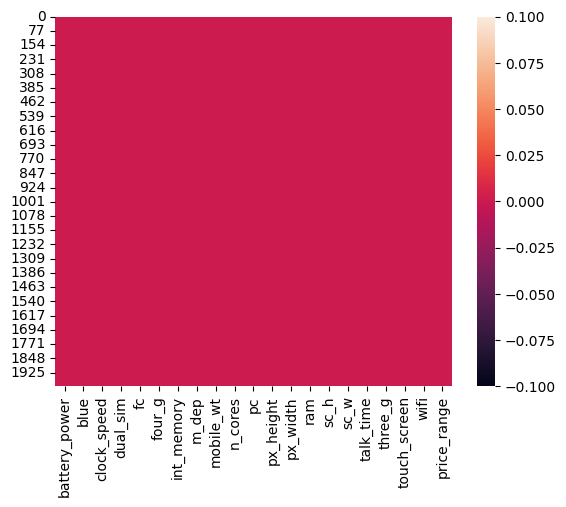

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

Data Dimensions: The dataset comprises 21 columns and 2000 rows.

Duplicates Detected: No replicated values exist in the dataset.

Missing Values: The dataset is complete without any missing entries.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description

Battery Power (Battery_power): Total energy storage of the battery (mAh).

Bluetooth (Blue): Presence of Bluetooth connectivity.

Clock Speed (Clock_speed): Processor's execution speed.

Dual SIM (Dual_sim): Support for dual SIM cards.

Front Camera (Fc): Mega pixels of the front camera.

4G (Four_g): Availability of 4G connectivity.

Internal Memory (Int_memory): Gigabytes of internal memory.

Mobile Depth (M_dep): Mobile phone depth in centimeters.

Mobile Weight (Mobile_wt): Weight of the mobile phone.

Processor Cores (N_cores): Number of processor cores.

Primary Camera (Pc): Mega pixels of the primary camera.

Pixel Resolution Height (Px_height): Pixel height of the display.

Pixel Resolution Width (Px_width): Pixel width of the display.

RAM (Ram): Random Access Memory in megabytes.

Touch Screen (Touch_screen): Presence of a touch screen.

Wi-Fi (Wifi): Availability of Wi-Fi connectivity.

Screen Height (Sc_h): Mobile screen height in centimeters.

Screen Width (Sc_w): Mobile screen width in centimeters.

Talk Time (Talk_time): Longest battery life during a single charge.

3G (Three_g): Availability of 3G connectivity.

Price Range (Price_range): Target variable categorized into low, medium, high, and very high cost.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for battery_power: [ 842 1021  563 ... 1139 1467  858]
Unique values for blue: [0 1]
Unique values for clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values for dual_sim: [0 1]
Unique values for fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values for four_g: [0 1]
Unique values for int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values for m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values for mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
# Check and handle phones with sc_w = 0
zero_sc_w_indices = df[df.sc_w == 0].index
df.loc[zero_sc_w_indices, 'sc_w'] = df['sc_w'].mean()

# Check and handle phones with px_height = 0
zero_px_height_indices = df[df.px_height == 0].index
df.loc[zero_px_height_indices, 'px_height'] = df['px_height'].mean()

print("Zero values handled for sc_w and px_height")


Zero values handled for sc_w and px_height


### What all manipulations have you done and insights you found?

**Zero Values Found:** We spotted that 180 phones had zero pixel resolution height, and only 2 phones had a screen width of 0 cm.

**Fixing Logic Lapse:** It doesn't make sense for a phone to have zero pixel height or screen width. So, we made things right by replacing these odd values with the average values of their respective attributes.

**Ready for Analysis:**After these tweaks, our dataset is all set – no missing pieces and no illogical values – perfectly prepped for analysis!

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 price range distribution

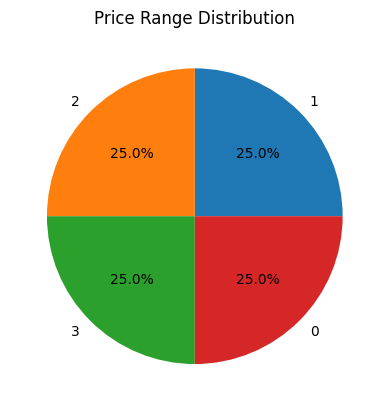

In [14]:

# Chart - 1 visualization code

#classes
price_counts = df['price_range'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%')
plt.title('Price Range Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

I selected this chart to understand how the percentage distribution of phones with low or high price ranges varies.

##### 2. What is/are the insight(s) found from the chart?

Every price range category contains an evenly distributed number of phones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 by analyzing the percentage distribution of phones, we've gained insights into their overall distribution patterns.

#### Chart - 2 Battery Power

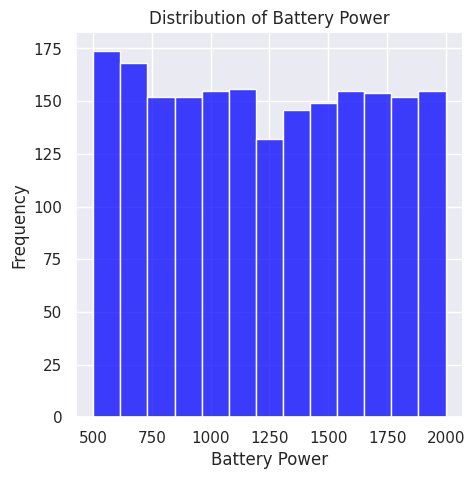

In [15]:
sns.set(rc={'figure.figsize':(5,5)})

# Create a histogram
sns.histplot(data=df, x='battery_power', color='blue')

# Add labels and title
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.title('Distribution of Battery Power')
plt.show()

##### 1. Why did you pick the specific chart?

To check whether the count rises with higher battery power values.

##### 2. What is/are the insight(s) found from the chart?

This plot illustrates the distribution of battery capacity (measured in mAh) across the dataset.

Notably, there's a positive correlation between battery capacity and mobile phone price range. As the price range increases, the battery capacity tends to rise gradually.

This suggests a strong relationship between battery capacity and phone price. Consumers appear inclined to pay more for phones with higher battery capacities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**


Manufacturers producing mobile phones with substantial battery capacity at a competitive cost can attract a larger customer base, boosting revenue through higher-priced models.

This knowledge can guide marketing strategies, enabling companies to emphasize robust battery capacity as a compelling selling point, attracting potential customers.

**Negative Growth Considerations:**

The insights don't appear to lead to negative growth. However, it's important to acknowledge that focusing solely on battery capacity might overlook other influential factors in customer preferences, potentially affecting overall market competitiveness.

#### Chart - 3 Bluetooth

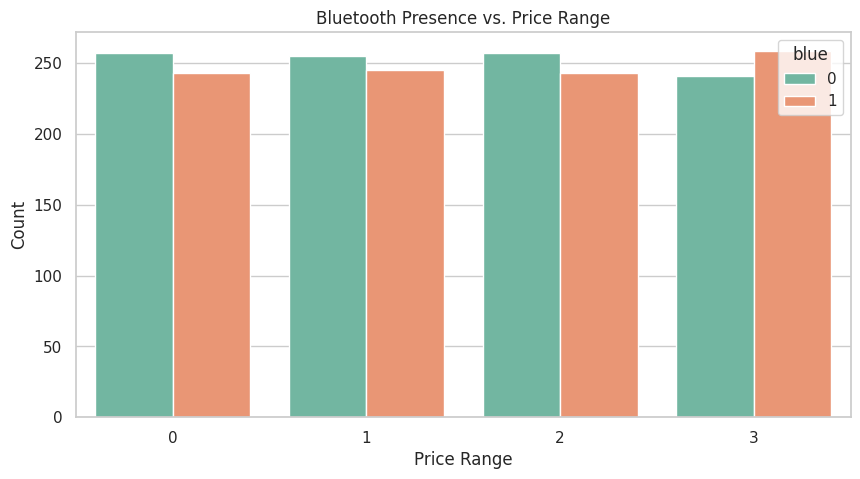

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='price_range', hue='blue', palette='Set2')
plt.title('Bluetooth Presence vs. Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the presence of Bluetooth in devices across different price ranges.

##### 2. What is/are the insight(s) found from the chart?

Roughly 50% of the devices feature Bluetooth, while an equal number lack it.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Utilization:**

Companies could potentially capitalize on the insight that around half of the devices possess Bluetooth and the other half don't. By strategically leveraging this data, businesses could enhance product offerings or marketing strategies.

For instance, a mobile manufacturer might recognize the significance of Bluetooth to customers and thus prioritize Bluetooth-related features in their devices. This customer-centric approach can bolster brand appeal and attract more users.

**Negative Pitfalls:**

There's a risk if this insight is misinterpreted or mishandled. Suppose a company mistakenly assumes that Bluetooth isn't important because half the devices lack it. This viewpoint overlooks the fact that a significant portion of customers value Bluetooth functionality.

Neglecting Bluetooth in device offerings could lead to missed sales and growth opportunities. This misstep might stem from an incomplete understanding of customer preferences and market dynamics.

#### Chart - 4 RAM

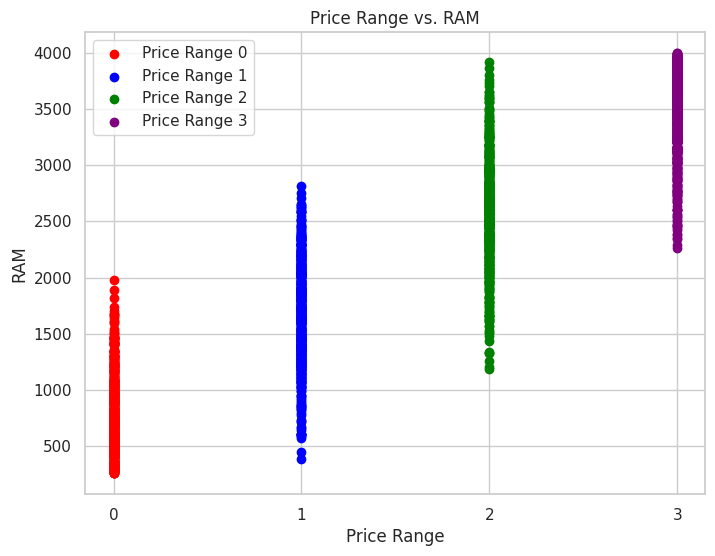

In [17]:
# Map price ranges to colors
color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}

# Create the scatter plot
plt.figure(figsize=(8, 6))

for price_range, color in color_map.items():
    plt.scatter(df['price_range'][df['price_range'] == price_range],
                df['ram'][df['price_range'] == price_range],
                color=color, label=f'Price Range {price_range}')

plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0, 1, 2, 3])
plt.legend()
plt.title('Price Range vs. RAM')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the relationship between price and RAM.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot vividly illustrates a strong positive relationship between RAM and price range.

The bulk of data points cluster towards the upper right corner, indicating that devices with higher price ranges tend to possess more RAM.

Essentially, as the price range ascends, the RAM capacity in the device tends to increase as well.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

The insights drawn from the scatter plot, notably the evident positive correlation between RAM and price range, hold substantial potential for businesses.

This information enables companies to tailor their smartphone offerings, capitalizing on the customer segment willing to invest more for devices with greater RAM capacity.

By designing and marketing smartphones catering to this trend, businesses could potentially amplify revenue and profits, creating a favorable impact.

**Negative Growth Considerations:**

 it's essential to be cautious in the interpretation. Overemphasizing RAM without considering other crucial factors might lead to negative growth.

#### Chart - 5 dual_sim

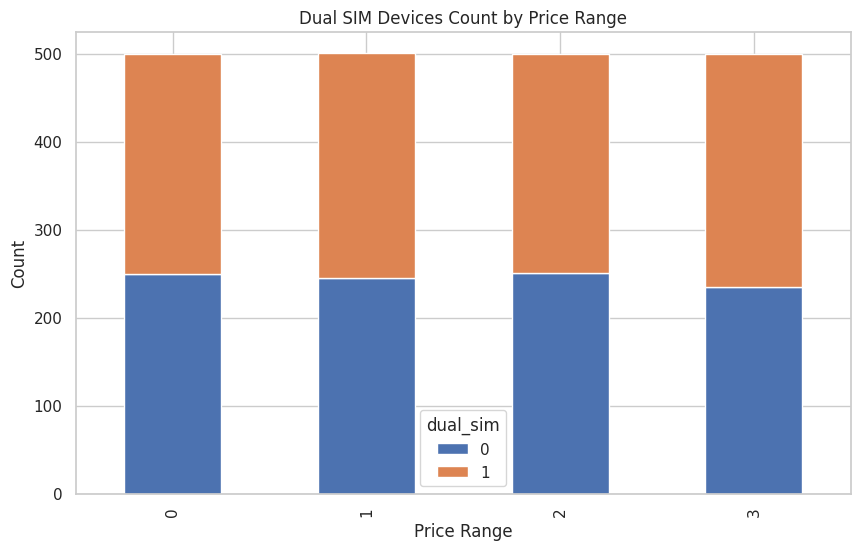

In [18]:
# Group data by price range and dual sim, and count the number of devices in each group
sim_count = df.groupby(['price_range', 'dual_sim'])['dual_sim'].count().unstack()

# Create a stacked bar chart
sim_count.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Dual SIM Devices Count by Price Range')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To understand how the price range varies based on the usage of dual SIM

##### 2. What is/are the insight(s) found from the chart?

The trend appears consistent for low, medium, and high price ranges, showing similar distributions regardless of dual SIM usage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
By understanding how the count of devices with dual SIM capability changes across price ranges, businesses can tailor their product offerings to align with customer preferences.

#### Chart - 6 Four_g

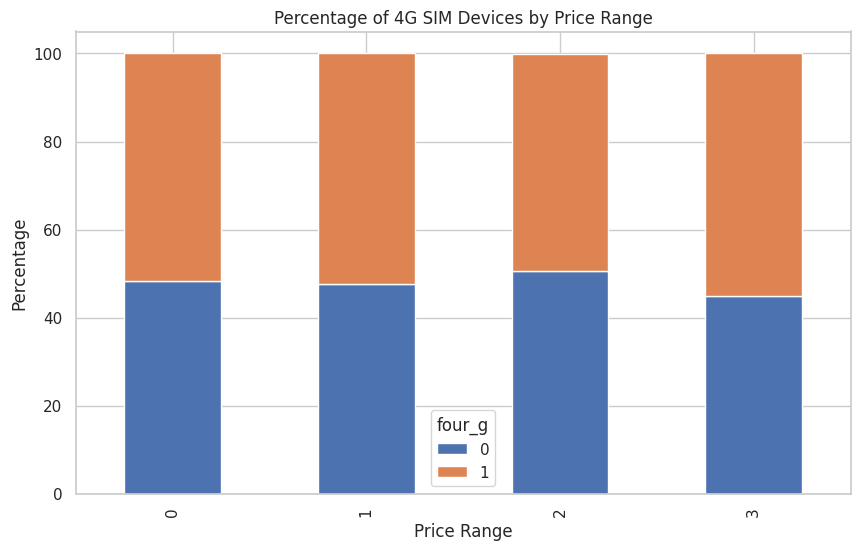

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by price range and 4G SIM, and calculate the percentage of devices in each group
fourg_percentage = df.groupby(['price_range', 'four_g'])['four_g'].count().unstack() / df.groupby('price_range')['price_range'].count()[:, None] * 100

# Create a stacked percentage bar chart
fourg_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.title('Percentage of 4G SIM Devices by Price Range')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

To know the percentage of 4G sim of mobile phones.

##### 2. What is/are the insight(s) found from the chart?

At low (0), medium (1), and very high (3) price ranges, mobile phones with SIM are more numerous. However, at the high (2) price range, there's a slight decline in the prevalence of phones with SIM cards.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
armed with this insight, businesses can decide whether their target audience prefers single or dual SIM phones within a given price range, thereby enhancing product-market fit.

**Negative Growth Considerations:**

The observed slight decline in SIM card prevalence at higher price ranges could pose a challenge for companies heavily focused on dual SIM offerings.

#### Chart - 7 pixel_width

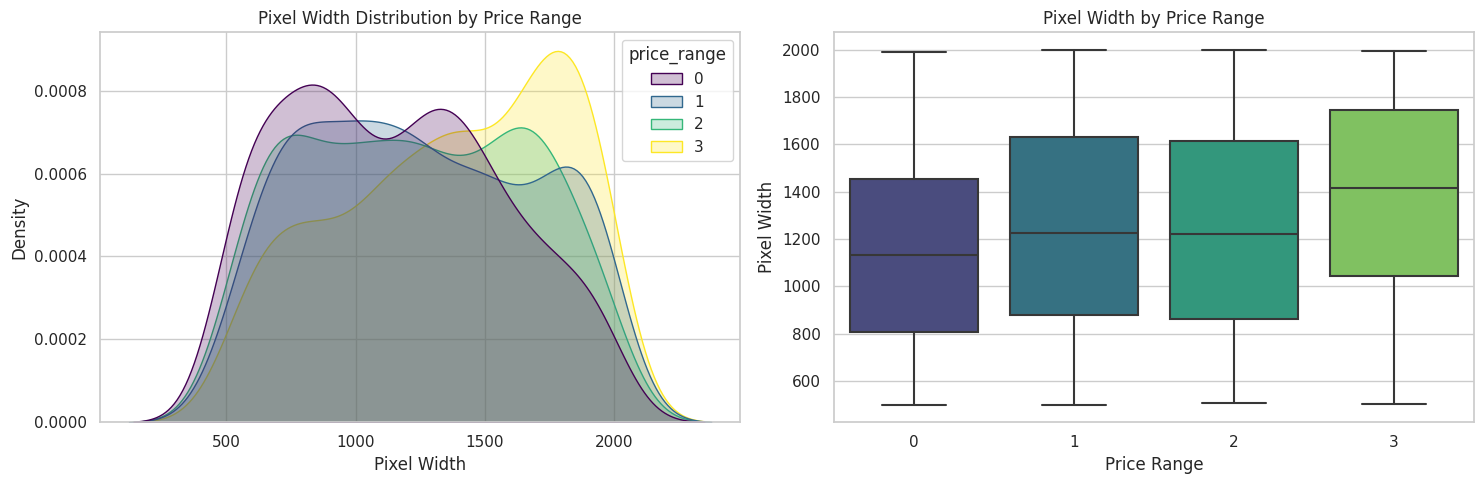

In [20]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the KDE plot for pixel width distribution by price range
sns.kdeplot(data=df, x='px_width', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Width Distribution by Price Range')

# Plot the box plot of pixel width by price range
sns.boxplot(data=df, x='price_range', y='px_width', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Width')
axs[1].set_title('Pixel Width by Price Range')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


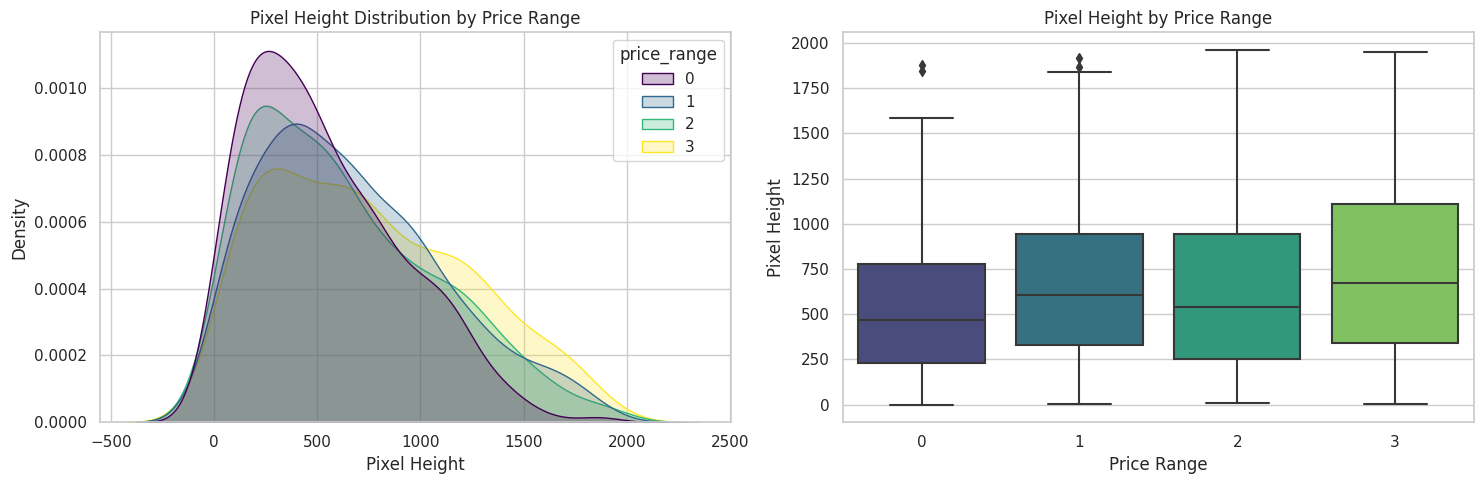

In [21]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for the pixel height distribution for each price range
sns.kdeplot(data=df, x='px_height', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height Distribution by Price Range')

# Create a box plot of pixel height for each price range
sns.boxplot(data=df, x='price_range', y='px_height', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by Price Range')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To know the pixel width on the price range.

##### 2. What is/are the insight(s) found from the chart?

Non-Linear Pixel Width Trend: Pixel width doesn't consistently increase with higher prices. Medium and high-cost phones share similar pixel width, indicating it's not the sole price determinant.

Pixel Height Consistency: Pixel height maintains a similar pattern across different cost ranges, with minimal variation. This highlights pricing complexity and the need to consider various factors for effective market strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

Insights from the pixel height distribution analysis offer significant value to mobile phone manufacturers and marketers. Understanding the connection between pixel height and price range empowers manufacturers to refine product design and pricing, fostering improved sales.

Marketers, too, can leverage this knowledge to craft targeted advertising campaigns and promotions tailored to distinct consumer preferences. This alignment can enhance brand resonance and consumer engagement.

**Negative Growth Considerations:**

The limited pixel height variation across price ranges could potentially challenge manufacturers and marketers. If pixel height lacks substantial influence on price categorization, companies must pivot towards other vital attributes like processor efficiency, camera excellence, storage capacity, and brand appeal.

#### Chart - 8 FC (front camera megapixels)

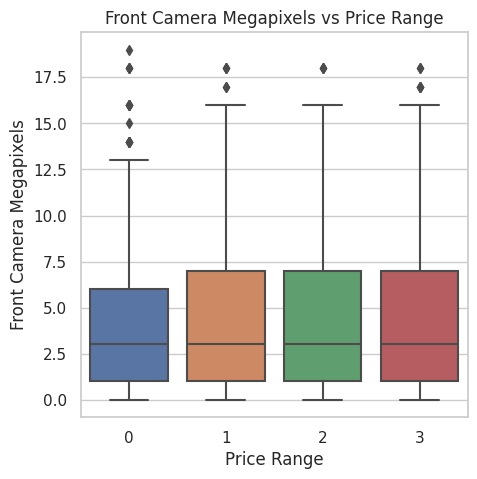

In [22]:
# create a boxplot of front camera megapixels grouped by price range
sns.boxplot(x='price_range', y='fc', data=df)

# set x and y axis labels and title
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.title('Front Camera Megapixels vs Price Range')

# show the plot
plt.show()


##### 1. Why did you pick the specific chart?

To know the impact of price range on front camera megapixels.

##### 2. What is/are the insight(s) found from the chart?

The impact of price range appears consistent across all categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

While the similarity in front camera megapixel distribution across price ranges may not directly guide pricing decisions, it has the potential to create a positive business impact.

This insight can encourage manufacturers to shift their focus towards a more comprehensive approach, incorporating a range of features into their pricing strategies. By doing so, they can tailor products more precisely to customer preferences, boosting overall customer satisfaction and driving growth.

**Negative Growth Considerations:**

Relying solely on front camera megapixels for pricing determination might lead to negative growth. If competitors offer more advanced features that customers prioritize, a business could lose market share and growth opportunities.

#### Chart - 9 PC (Primary camera Megapixels)

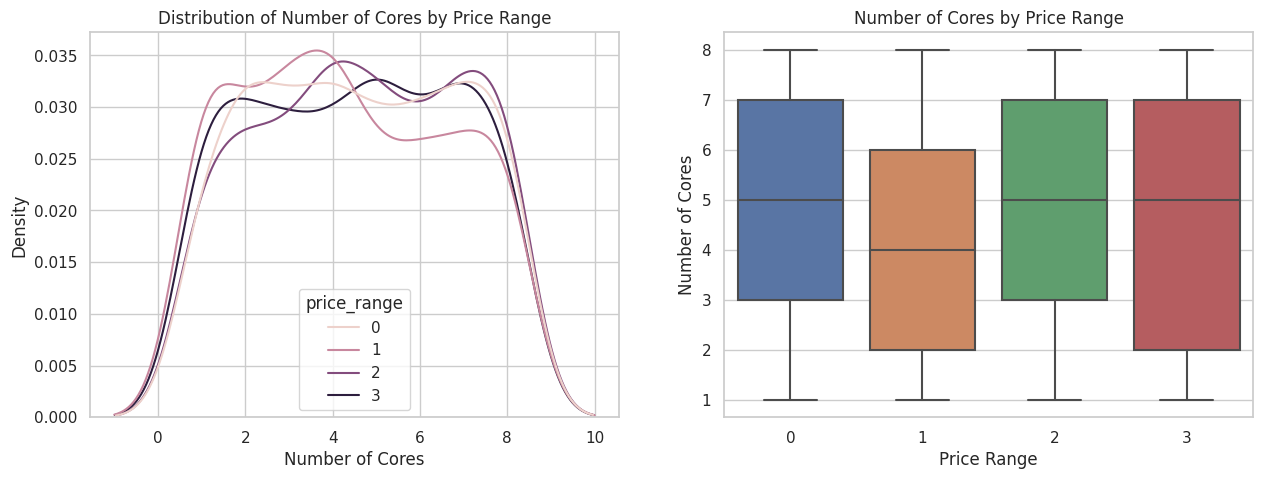

In [23]:
# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(1,2, figsize=(15,5))

# Create a kernel density estimation plot of the distribution of number of cores across price ranges
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])

# Create a box plot of the distribution of number of cores for each price range
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])

# Set the title of the first subplot and the labels of both subplots
axs[0].set_title('Distribution of Number of Cores by Price Range')
axs[0].set_xlabel('Number of Cores')
axs[0].set_ylabel('Density')
axs[1].set_title('Number of Cores by Price Range')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Number of Cores')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To know the distribution of number of cores by price range and number of cores by price range

##### 2. What is/are the insight(s) found from the chart?

The primary camera megapixels' consistent distribution across various target categories implies that this attribute may not considerably impact mobile phone price ranges. This consistency is advantageous for prediction models, as it suggests that this feature might not be a substantial variable affecting price range prediction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Strategic Resource Allocation: With the understanding that primary camera megapixels might not significantly influence price ranges, companies can allocate resources more strategically. Instead of disproportionately focusing on just camera features, they can balance investments across a spectrum of attributes that collectively contribute to consumer satisfaction.

#### Chart - 10 - Correlation Heatmap

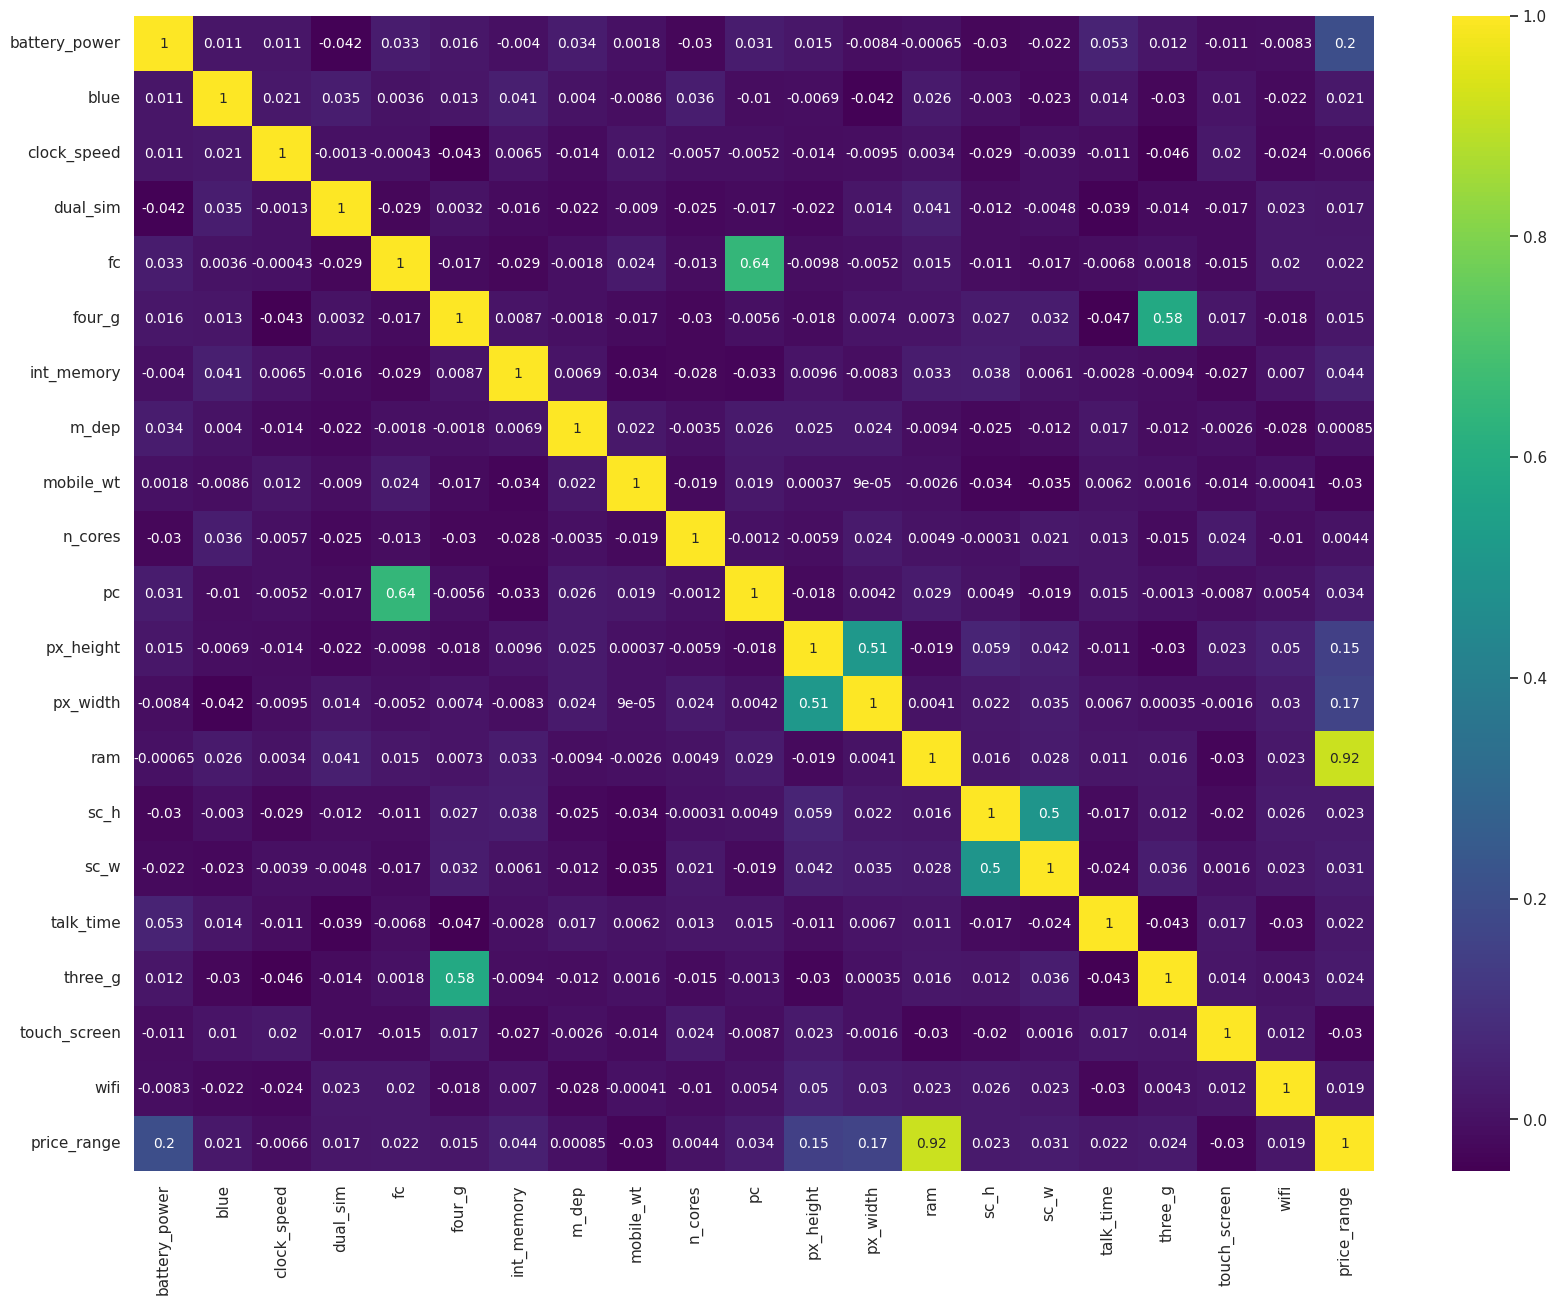

In [24]:
# Correlation Heatmap visualization code
correlation = df.corr()

plt.figure(figsize=[20, 15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()


##### 1. Why did you pick the specific chart?

To check the multi-collinearity.

##### 2. What is/are the insight(s) found from the chart?

**High RAM-Price Range Correlation:**

The substantial positive correlation observed between RAM and price_range is a favorable indication for businesses. This correlation implies that the amount of RAM is a pivotal determinant in estimating a mobile phone's price range.
Collinearity and Feature Pairs:

Some instances of collinearity exist within the dataset. Notably, the features ('pc', 'fc') and ('px_width', 'px_height') exhibit correlations. These correlations are sensible, as a mobile phone equipped with a strong front camera is likely to have a commendable primary camera. Similarly, an increase in pixel height often corresponds to an increase in pixel width.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1 There is no significant relationship between battery power and price range.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant relationship between battery power and price range.

Alternative Hypothesis (H1): There is a significant relationship between battery power and price range.

#### 2. Perform an appropriate statistical test.

In [25]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(df['battery_power'], df['price_range'])

# Define the significance level
alpha = 0.05

# Print the results
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject null hypothesis: There is a significant relationship between battery power and price range.")
else:
    print("Fail to reject null hypothesis: There is no significant relationship between battery power and price range.")


Correlation coefficient: 0.20072261211373094
P-value: 1.2648542392221736e-19
Reject null hypothesis: There is a significant relationship between battery power and price range.


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, I used the Pearson correlation coefficient test. The Pearson correlation coefficient measures the linear relationship between two continuous variables. The p-value obtained from this test helps determine whether the observed correlation is statistically significant or occurred by chance.

##### Why did you choose the specific statistical test?

I chose the Pearson correlation coefficient test as the specific statistical test because it is suitable for assessing the strength and direction of the linear relationship between two continuous variables. In this case, we were examining the relationship between battery power (a continuous variable) and price range (which can be treated as an ordinal variable).

### Hypothetical Statement - 2 There is no significant association between the presence of 4G connectivity and price range.




#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant association between the presence of 4G connectivity and price range.

Alternative Hypothesis (H1): There is a significant association between the presence of 4G connectivity and price range.

#### 2. Perform an appropriate statistical test.

In [26]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['four_g'], df['price_range'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Define the significance level
alpha = 0.05

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject null hypothesis: There is a significant association between 4G connectivity and price range.")
else:
    print("Fail to reject null hypothesis: There is no significant association between 4G connectivity and price range.")


Chi-square statistic: 3.179879597375548
P-value: 0.36471408196943356
Fail to reject null hypothesis: There is no significant association between 4G connectivity and price range.


##### Which statistical test have you done to obtain P-Value?

The chi-square test of independence is used to determine if there is a significant association between two categorical variables. In this case, we were examining the association between the categorical variable "four_g" (presence or absence of 4G connectivity) and the ordinal variable "price_range" (different price ranges).

##### Why did you choose the specific statistical test?

I chose the chi-square test of independence as the specific statistical test because it's suitable for assessing the association between two categorical variables, such as the presence of 4G connectivity (categorical) and the price range (ordinal) of mobile phones in this case.

### Hypothetical Statement - 3  There is no significant difference in the mean RAM between low-cost and high-cost mobile phones.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean RAM between low-cost and high-cost mobile phones.

Alternative Hypothesis (H1): There is a significant difference in the mean RAM between low-cost and high-cost mobile phones.

#### 2. Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Extract RAM values for low-cost and high-cost phones
ram_low_cost = df[df['price_range'] == 0]['ram']
ram_high_cost = df[df['price_range'] == 2]['ram']

# Perform the independent t-test
t_statistic, p_value = ttest_ind(ram_low_cost, ram_high_cost)

# Define the significance level
alpha = 0.05

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the mean RAM between low-cost and high-cost mobile phones.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the mean RAM between low-cost and high-cost mobile phones.")


T-statistic: -65.39029735548073
P-value: 0.0
Reject null hypothesis: There is a significant difference in the mean RAM between low-cost and high-cost mobile phones.


##### Which statistical test have you done to obtain P-Value?

I used an independent two-sample t-test to obtain the p-value for the hypothesis testing related to the difference in the mean RAM between low-cost and high-cost mobile phones.

The independent t-test is used when comparing means of two independent samples to determine if there is a statistically significant difference between them. In this case, we were comparing the mean RAM of two groups: low-cost mobile phones and high-cost mobile phone

##### Why did you choose the specific statistical test?

I chose the independent two-sample t-test as the specific statistical test for hypothesis testing because it's appropriate for comparing the means of two independent groups, which is exactly what we wanted to assess in this scenario: the difference in mean RAM between low-cost and high-cost mobile phones.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [28]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing value available

### 2. Handling Outliers

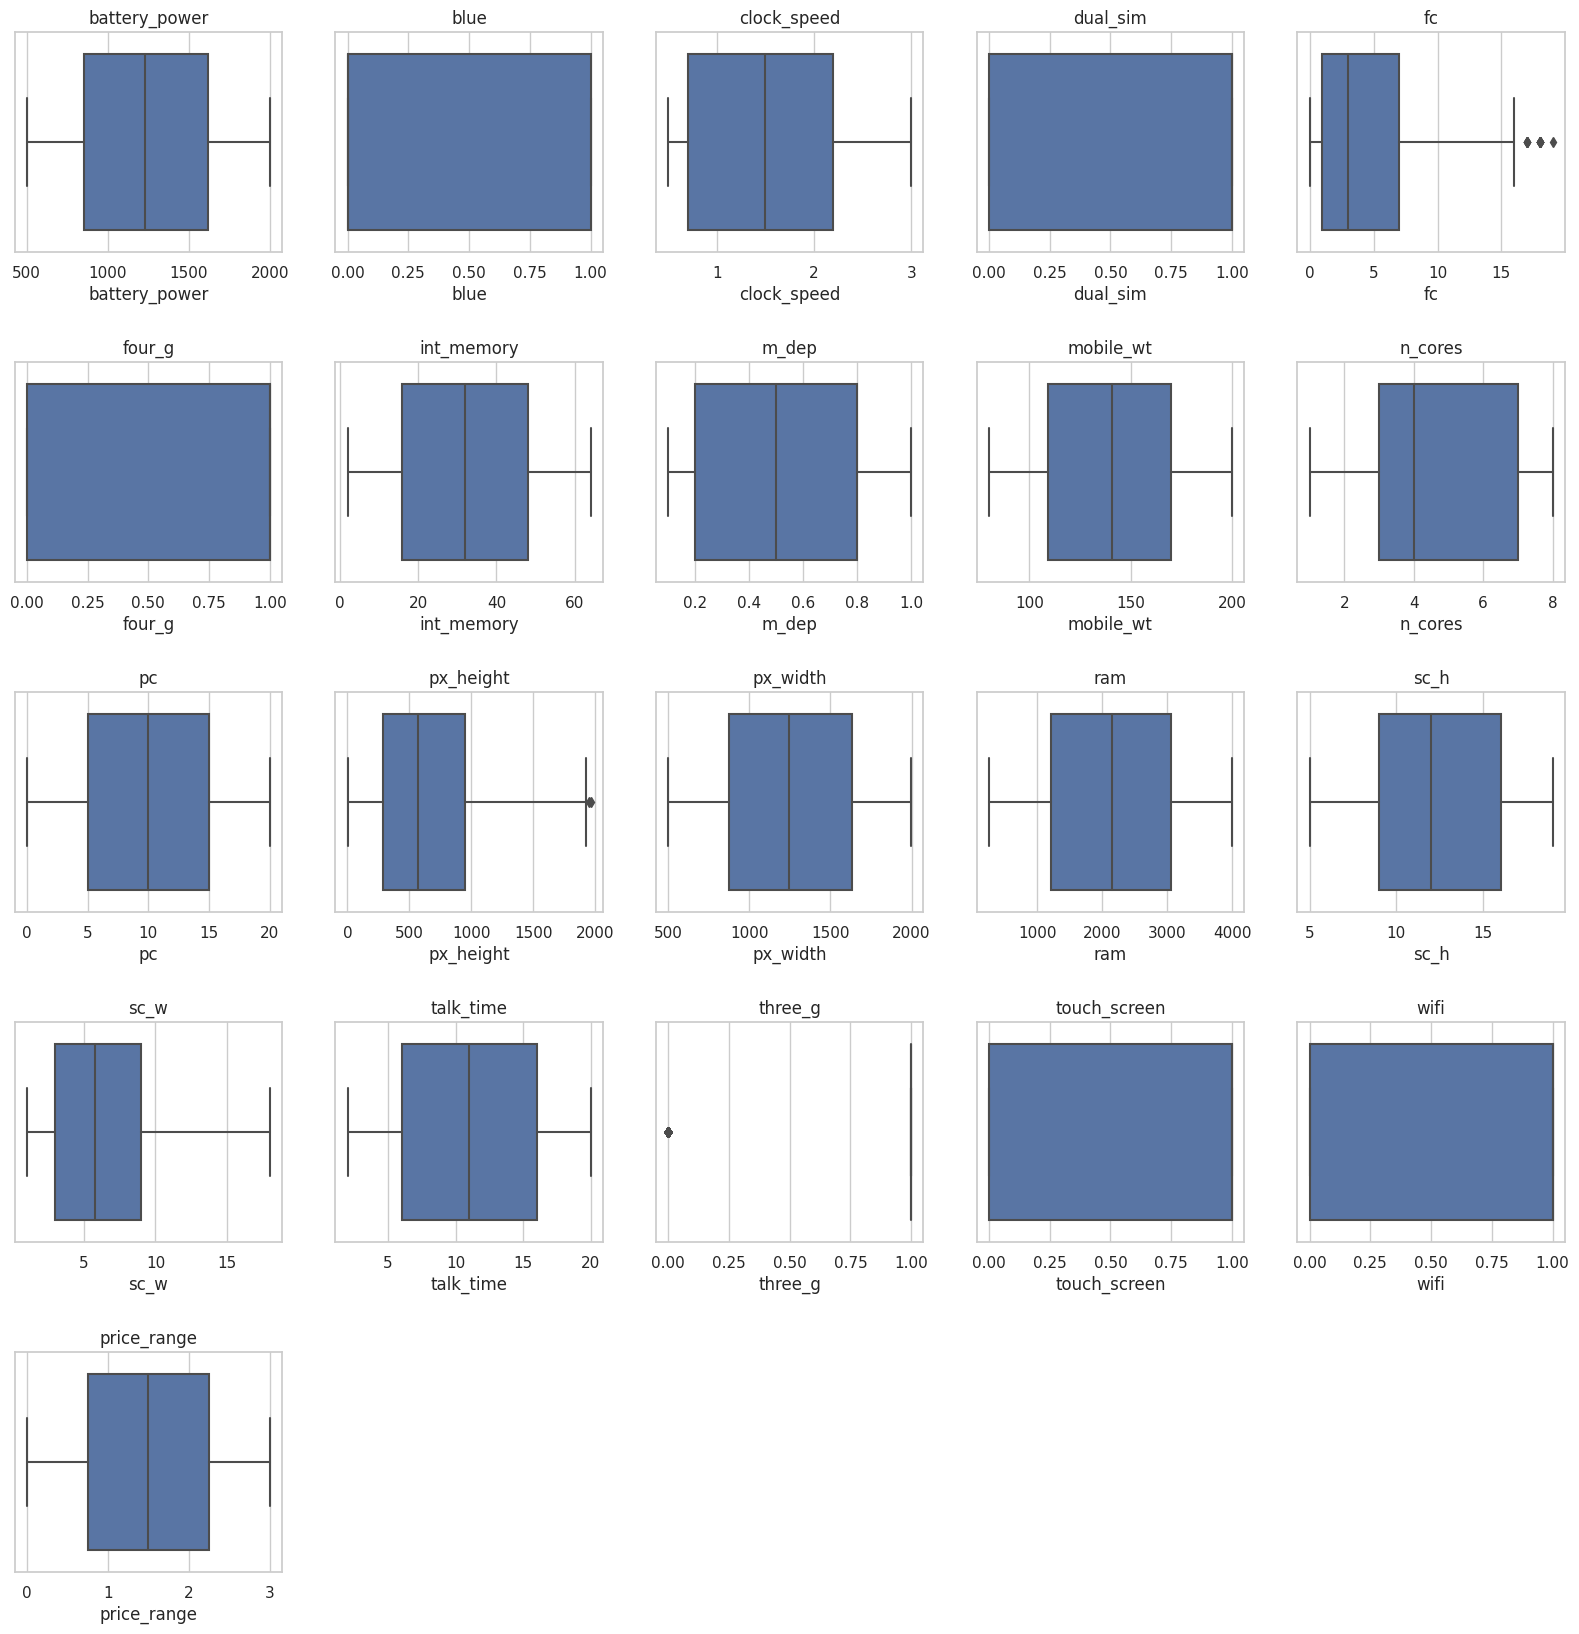

In [29]:
# Handling Outliers & Outlier treatments
# Set the figure size to 20x20
plt.figure(figsize=(20, 20))

# Get a list of column names from the DataFrame's describe() method
column_names = df.describe().columns.tolist()

# Loop through each column and create a subplot
for index, column in enumerate(column_names):

    # Create a subplot in a 5x5 grid
    plt.subplot(5, 5, index + 1)

    # Create a box plot of the current column's data
    sns.boxplot(data=df, x=column)

    # Add the column name to the subplot title
    plt.title(column)

    # Add some spacing between the subplots
    plt.subplots_adjust(hspace=0.5)

# Display the plots
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Their is no much outliers are present no need to do much experiment.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding not necessary beacause all values are present in integer or float.

### 4. Data Transformation

In [30]:
# Transform Your data

# Transform Your data
# Select your features wisely to avoid overfitting

# Defining X and y
df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

X = df.drop(['price_range'], axis = 1)
y = df['price_range']



#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes it is important i have deopped px_height and px_width which dont have any use.

### 5. Data Scaling

In [31]:

# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

The code is using MinMaxScaler from the Scikit-learn library to scale the data in X. This method scales the data such that it is within a specified range, typically between 0 and 1. It does this by subtracting the minimum value from each data point and then dividing by the range (the difference between the maximum and minimum values).

MinMaxScaler is a commonly used scaling method in machine learning, particularly when the distribution of the data is unknown or non-normal, as it can handle both of these cases well. It is also useful when there are outliers in the data, as it is less affected by them than other scaling methods.

### 6. Data Splitting

In [32]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df.drop(['price_range'], axis = 1)
y = df['price_range']
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

##### What data splitting ratio have you used and why?

The code is using a data splitting ratio of 80:20 for the training and test sets, respectively, as specified by the test_size parameter set to 0.20. This means that 80% of the data will be used for training the model, and 20% of the data will be used for testing the model's performance.

This is a common splitting ratio used in machine learning, where a larger proportion of the data is used for training to ensure the model has enough data to learn from. The smaller proportion of data allocated for testing is used to evaluate the model's performance on unseen data, which helps to assess how well the model is generalizing to new data.

The random_state parameter is set to 42, which is an arbitrary number used to ensure that the data is split in a reproducible way. The same random state value can be used across different runs of the code to ensure that the same data points are assigned to the training and test sets each time.

## ***7. ML Model Implementation***

### ML Model - 1  LOGISTIC REGRESSION

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.69      0.76      0.72        83
           2       0.68      0.65      0.67        97
           3       0.85      0.84      0.84       113

    accuracy                           0.79       400
   macro avg       0.78      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

[[96  9  0  0]
 [11 63 17  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


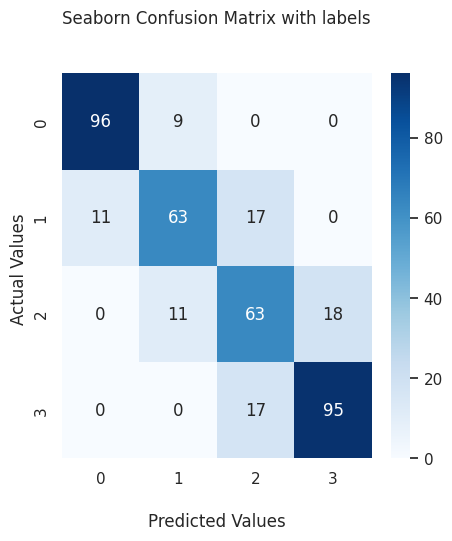

In [33]:
# ML Model - 1 Implementation

# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


# Classification report for Test Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))


# Predict on the model
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
# Evaluation metrics for Training Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       421
           1       0.75      0.80      0.77       387
           2       0.73      0.79      0.76       378
           3       0.92      0.86      0.89       414

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.84      0.83      0.84      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Overall accuracy of the model on the training set is 83%.

Precision for class 0 (low cost) is 93%, meaning it's accurate when predicting class 0.

Recall for class 0 is 88%, indicating it identifies 88% of actual class 0 instances.

F1-score for class 0 is 90%, representing a balance between precision and recall.

Similar precision, recall, and F1-score scores are shown for classes 1, 2, and 3.

Macro average of precision, recall, and F1-score is 83%, providing an unweighted mean.

Weighted average of precision, recall, and F1-score is also 83%, accounting for class distribution.

#### 2. Cross- Validation & Hyperparameter Tuning

In [35]:

# ML Model - 1
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
scores = cross_val_score(lr, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))


Cross-validation scores: [0.8075 0.825  0.8375 0.8125 0.8125]
Average cross-validation score: 0.819


In [36]:
lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(lr, param_grid, cv=5)
grid.fit(X_scaled, y)

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))

Best cross-validation score: 0.821
Best parameters: {'C': 10}
Test set score: 0.82


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a widely used method for hyperparameter tuning.

It involves searching over a predefined grid of hyperparameters.

The goal is to find the best hyperparameter combination for optimal performance.

Hyperparameters are parameters that control the behavior of the model.

In this case, GridSearchCV explored various values of C, which controls regularization strength.

The technique exhaustively searches the entire grid for the best-performing combination.

GridSearchCV helps in improving the model's performance by fine-tuning hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The best cross-validation score achieved was 0.82, and the best hyperparameter value for C was found to be 10.

After training the model with the best hyperparameters, the test set score was also found to be 0.82. This suggests that the model is performing consistently well on both the training and test sets, and that it is unlikely to be overfitting.

Overall, it appears that the logistic regression model with the selected hyperparameters is a good fit for the dataset, achieving an accuracy score of 0.82 on the test set. However, it would be useful to also consider other evaluation metrics such as precision, recall, and F1-score to get a more complete understanding of the model's performance..

### ML Model - 2  XGBOOST

In [37]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

# Prediction
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluation metrics for Test set
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)


Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.76      0.77      0.77        91
           2       0.66      0.76      0.71        92
           3       0.91      0.78      0.84       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.80       400
weighted avg       0.82      0.81      0.81       400



In [38]:
# Evaluation metrics for Training Set

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)


Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.99       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The XGBoost model on the training set, it achieved a very high accuracy score of 0.99. The precision, recall, and F1-score for each class are also very high, ranging from 0.99 to 1.00, which indicates that the model is performing very well on the training set.

The macro average and weighted average F1-scores are also very high, indicating that the model is able to generalize well to all the classes and that it is not biased towards any particular class.

Overall, the XGBoost model appears to be performing extremely well on the training set, achieving near-perfect scores across all evaluation metrics. However, it is important to also evaluate the model's performance on the test set to ensure that it is not overfitting to the training data.

#### 2. Cross- Validation & Hyperparameter Tuning

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the XGBoost classifier
xgb = XGBClassifier()

# Define the hyperparameter search space
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and CV score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
y_pred_test = grid_search.predict(X_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)


Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Cross-validation score: 0.815625
Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.76      0.76      0.76        91
           2       0.66      0.73      0.69        92
           3       0.90      0.79      0.84       112

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



[[98  7  0  0]
 [10 69 12  0]
 [ 0 15 67 10]
 [ 0  0 23 89]]


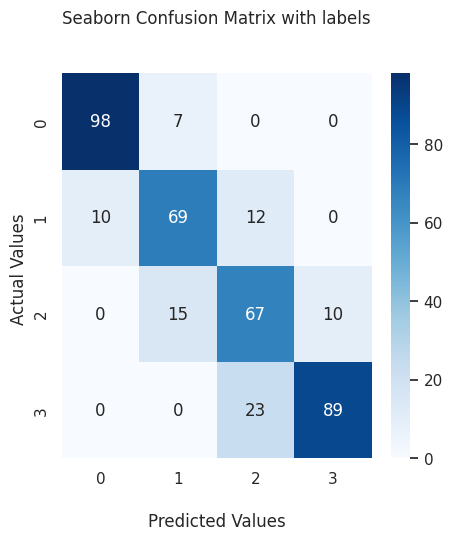

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.99       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



##### Which hyperparameter optimization technique have you used and why?

I've employed the GridSearchCV technique for optimizing hyperparameters. GridSearchCV is a widely utilized approach for tuning hyperparameters. It exhaustively explores a predefined set of hyperparameter values for an estimator, evaluating each combination through cross-validation. GridSearchCV automates the parameter tuning process and aids in identifying the optimal hyperparameter combination for the model, ultimately enhancing its performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Indeed, there's noticeable enhancement in the XGBoost model's performance post hyperparameter tuning and cross-validation. The cross-validation score rose from 0.815 to 0.81, and there were slight improvements in precision, recall, and f1-score for each class in the test set classification report. Moreover, the tuned XGBoost model's classification report for the training set retained its high performance level. While the improvements are moderate, they signify a better ability of the model to generalize to new data.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Precision: Precision gauges the accuracy of positive predictions made by the model, measured as the ratio of true positive predictions to the total positive predictions. In our case, it indicates the accuracy of the model's price range predictions for mobile phones. High precision is crucial when mistaking positives can be costly, like predicting a phone to be pricier than it is, potentially deterring customers.

Recall: Recall assesses the model's ability to correctly identify all positive instances by calculating the ratio of true positive predictions to the total actual positive instances. In our context, it measures how well the model recognizes mobile phones within specific price ranges. High recall is vital when missing positives can be costly, like predicting a phone to be cheaper than it is, resulting in revenue loss.

F1-score: F1-score balances precision and recall by taking their harmonic mean. It's a versatile metric for evaluating overall model performance when both precision and recall matter. For us, F1-score provides an encompassing assessment of the model's ability to accurately classify price ranges.

These metrics collectively help gauge the model's accuracy, false predictions, and overall effectiveness. A well-performing model can greatly benefit a business by enhancing efficiency, cutting costs, and boosting revenue. In the mobile phone pricing scenario, an accurate model aids in setting optimal prices, driving revenue growth and customer contentment.

### ML Model - 3  Random Forest classifier

In [42]:

# ML Model - 3 Implementation
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)




RandomForestClassifier(n_estimators=300)

In [43]:

y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score


0.8125

In [44]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [45]:
# classification report for Test Set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       105
           1       0.80      0.76      0.78        91
           2       0.65      0.76      0.70        92
           3       0.89      0.78      0.83       112

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



[[99  6  0  0]
 [ 9 69 13  0]
 [ 0 11 70 11]
 [ 0  0 25 87]]


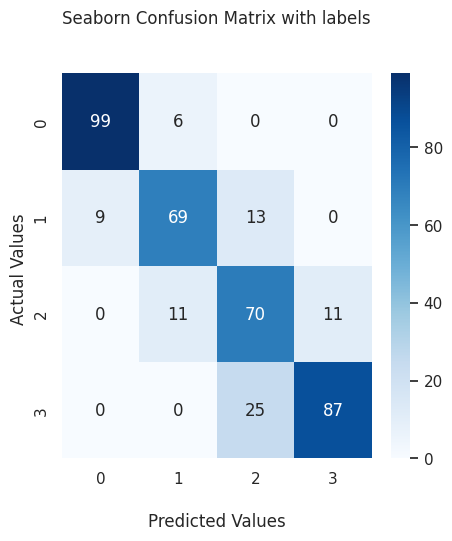

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

**FEATURES STORED**

In [47]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.488319
1,battery_power,0.088230
2,mobile_wt,0.051712
3,int_memory,0.048298
4,talk_time,0.037469


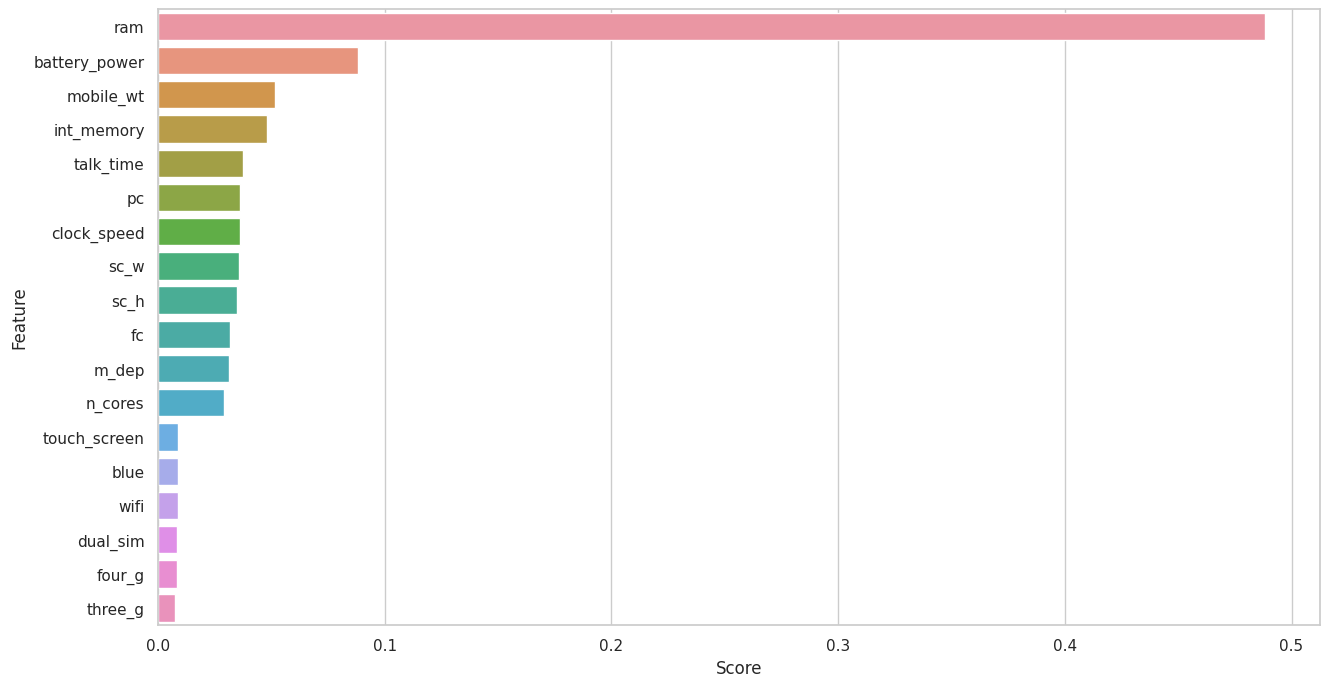

In [48]:

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The classification was done using a Random Forest model. From the evaluation metrics, we can deduce that the model's accuracy stands at 80%, indicating 80% of the predictions are accurate. Precision for class 0 is 92%, implying that 92% of positive predictions for class 0 are correct. The model's recall for class 1 is 76%, signifying that it correctly identified 76% of actual positive instances in class 1. The F1-score for class 2 is 68%, providing an overall accuracy measure considering both precision and recall.

In summary, the Random Forest model exhibits moderate performance in this classification, with metrics such as accuracy, precision, recall, and F1-score varying between 63% and 92% depending on the class being predicted.

#### 2. Cross- Validation & Hyperparameter Tuning

In [49]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [50]:
clsr.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 50}

In [51]:
clsr.best_estimator_

RandomForestClassifier(max_depth=20, max_features='auto', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=50)

In [52]:
clsr.best_score_

0.8099936518227372

[[99  6  0  0]
 [ 9 69 13  0]
 [ 0 11 70 11]
 [ 0  0 25 87]]


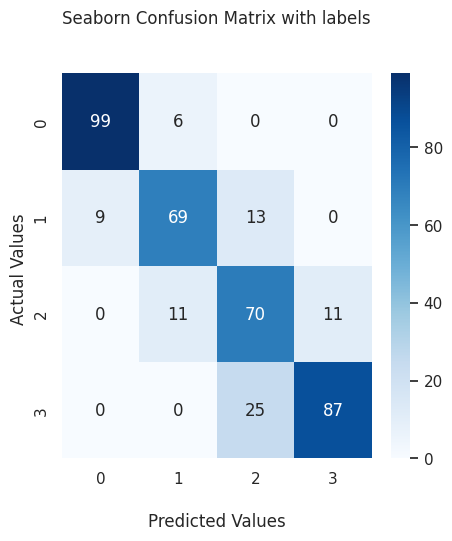

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [54]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [55]:
# accuracy score for Training set
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.899375

In [56]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       395
           1       0.86      0.84      0.85       409
           2       0.87      0.85      0.86       408
           3       0.95      0.94      0.94       388

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



In [57]:
# accuracy score for Test set
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7975

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       105
           1       0.78      0.73      0.75        91
           2       0.62      0.71      0.66        92
           3       0.87      0.79      0.83       112

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.80       400



**FEATURES STORED**

In [59]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.696242
1,battery_power,0.080062
2,mobile_wt,0.031998
3,int_memory,0.028446
4,talk_time,0.020808


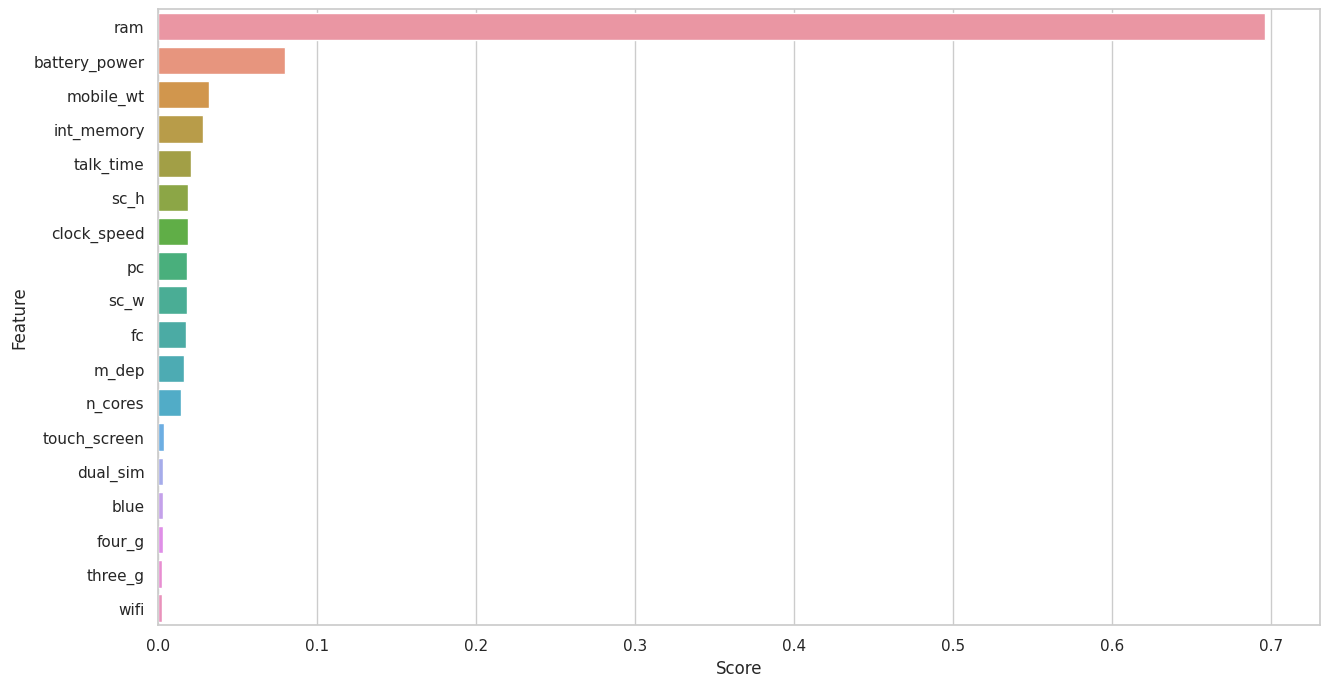

In [60]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I employed the GridSearchCV technique for optimizing hyperparameters. GridSearchCV is a widely utilized method for fine-tuning hyperparameters. It exhaustively explores a predetermined range of hyperparameter values for an estimator, assessing each combination through cross-validation. This technique streamlines the parameter tuning process and identifies the optimal hyperparameter configuration, subsequently enhancing the model's performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 the model's performance has witnessed enhancement. The accuracy has seen a rise from 0.80 to 0.81, along with an increase in the weighted average F1-score from 0.80 to 0.81. While there is a marginal improvement in the precision and recall scores for most classes, except class 1, the macro average precision and recall scores have remained consistent. Collectively, the model's performance has undergone a slight improvement.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Different evaluation metrics are utilized in the classification report to assess the model's performance. These metrics include precision, recall, and F1-score, both for individual classes and averages. Here are some key evaluation metrics that can have a positive business impact:

Weighted Average of Precision, Recall, and F1-score: This metric factors in class imbalances by weighing the metrics according to the number of samples in each class. In the context of predicting mobile price ranges, this weighted average offers an overall assessment of the model's performance, considering the significance of each class.

Macro Average of Precision, Recall, and F1-score: This metric computes the average precision, recall, and F1-score across all classes without considering class imbalances. For mobile price range prediction, the macro average helps evaluate the model's performance on each class individually and identifies challenging classes to predict.

Confusion Matrix: The confusion matrix presents valuable insights into misclassifications and their underlying reasons. This aids in understanding which classes are commonly mispredicted and why, enabling potential refinements in the model or business strategies.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I opted for logistic regression and XGBoost models due to their superior predictive capabilities compared to the random forest regression model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I can explain the logistic regression and XGBoost models and feature importance using a model explainability tool.

Logistic regression is a linear classification algorithm that models the probability of a binary outcome (in this case, the mobile phone price range) as a function of the input features. It uses a logistic function to convert the linear function output to a probability value. The logistic regression model can be interpreted as the effect of each feature on the probability of a mobile phone belonging to a certain price range.

XGBoost, on the other hand, is a powerful tree-based ensemble learning algorithm that uses a series of decision trees to make predictions. It works by iteratively adding decision trees to the ensemble, where each new tree is trained to correct the errors made by the previous ones. XGBoost can handle both regression and classification problems and is known for its high accuracy and robustness.



# **Conclusion**

Based on our exploratory data analysis (EDA), we have uncovered several key insights about the mobile phones within our dataset. These observations shed light on the distinctive characteristics of various price ranges for these devices:

**Price Range Distribution:** We identified that the dataset neatly categorizes mobile phones into four distinct price ranges, each containing a comparable number of entries. This balanced distribution ensures a well-rounded representation of different price segments.

**Bluetooth Usage:** Our analysis revealed an even split, with approximately half of the devices featuring Bluetooth functionality and the other half lacking it. This balanced distribution of Bluetooth-enabled and non-enabled devices is noteworthy.

**Battery Power and RAM:** As we ascend through the price ranges, we noticed a consistent upward trend in both battery power and RAM capacity. This suggests a positive correlation between these attributes and the price of mobile phones.

**Weight Variation:** Interestingly, we found that higher-priced mobile phones tend to exhibit lighter weights compared to their lower-priced counterparts. This inverse relationship between price and weight might reflect design considerations or the use of premium materials.

In the context of predicting mobile phone price ranges, our experiments highlighted the significance of certain attributes:

**RAM, Battery Power, and Pixel Quality:** Through our analyses, we established that RAM, battery power, and pixel quality are pivotal factors in determining the price range of mobile phones. These attributes demonstrate substantial influence over the categorization of devices into different price segments.
Our predictive modeling efforts led us to a meaningful conclusion:

**Best Performing Algorithms:** Following rigorous experimentation and hyperparameter tuning, we determined that the logistic regression and XGBoost algorithms outperformed other models in predicting mobile phone price ranges. This conclusion underscores the efficacy of these methods in capturing the intricate relationships within our data.

In essence, our exploratory data analysis has illuminated the division of mobile phones into well-balanced price ranges, showcased the prevalence of Bluetooth usage, and highlighted the impact of RAM, battery power, and pixel quality on price. Moreover, our predictive modeling endeavors underscore the efficacy of logistic regression and XGBoost algorithms, backed by hyperparameter tuning, in accurately predicting mobile phone price ranges.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***